# 3 Data integration in a single matrix (Healthy samples)

Made by: Cynthia Soto <br>
Date: 20 de Agosto 2020 <br>
Last md: 18 de febrero 2021 <br>

Data quantified with HTSeq (alignments done with STAR SA)  <br>
Datatype: normalized values in log2 <br>

Normalized data will be integrated in a single matrix <br>

**Workflow:** <br>
1) Merge the x dataframes in a single matrix<br>
2) Some basic statistics are built with the data matrix.  <br>
3) Zeros across all samples are dropped.  <br>

In [1]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts


***First letś try an example with two quantification files***

In [87]:
# Import Data (example with 2 cvs files)
df1=pd.read_csv("SRR3383640_Log2.csv", sep='\t', nrows=100, usecols=[1,3])
print(df1.shape)
## remove unnamed cols
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
#print(df1.columns)
df1.rename(columns={'log2_value':'SRR3383640'},inplace=True)
#print(df1.size)
print(df1.shape)
df1.head(5)

(100, 2)
(100, 2)


,Genes,SRR3383640
0,AT1G01010,6.523562
1,AT1G01020,6.768184
2,AT1G01030,3.807355
3,AT1G01040,10.005625
4,AT1G01050,9.733015


In [88]:
## Import Data 
df2=pd.read_csv("SRR3383641_Log2.csv", sep='\t', nrows=100, usecols=[1,3])
## Removes unnamed cols
df2.drop(df2.columns[df2.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
df2.rename(columns={'log2_value':'SRR3383641'},inplace=True)
#print(df2.size)
print(df2.shape)
df2.head(5)

(100, 2)


,Genes,SRR3383641
0,AT1G01010,7.592457
1,AT1G01020,8.066089
2,AT1G01030,4.523562
3,AT1G01040,11.165535
4,AT1G01050,10.854868


Use numpy.where(condition, x, y) with condition as a boolean expression comparing two columns. For each row of the two columns, the corresponding element of the resulting NumPy array is x if condition is True, and y otherwise.

In [89]:
## Look if different gene_names exist in the files (df)
comparison_column = np.where(df1["Genes"] == df2["Genes"], True, False)
print (comparison_column)

## If True all gene_names are equal, otherwise result is False

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [90]:
## Look for 'False' bool in the comparison, if found means something is different. A false means all are true (equal)
False in comparison_column

False

In [91]:
df1=df1.merge(df2,on=['Genes'],how='left')
df1

,Genes,SRR3383640,SRR3383641
0,AT1G01010,6.523562,7.592457
1,AT1G01020,6.768184,8.066089
2,AT1G01030,3.807355,4.523562
3,AT1G01040,10.005625,11.165535
4,AT1G01050,9.733015,10.854868
...,...,...,...
95,AT1G01930,7.087463,8.189825
96,AT1G01940,6.392317,7.199672
97,AT1G01950,7.826548,9.041659
98,AT1G01960,10.314017,11.269711


## Now, letś to merge all the cvs data files (df) in a unique matrix 

In [119]:
## CREATE A SINGLE MATRIX

all_files = glob.glob(s_path)
## load the main df
flag_b=True

for file in all_files:
    
    ## GET FILE NAME TO STORE STATISTICS
    f_name = file.split("_")
    x= f_name[1]
    f_name1=x.split("/")
    x1= f_name1[1]
    #print(x1)
    
    if flag_b:    ## load main df once
        #print(file)
        ## Main df is df1
        df1=pd.read_csv(file, sep='\t', usecols=[1,3])    ## nrows=100, 
        ## remove unnamed cols
        df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
        df1.rename(columns={'log2_value':x1},inplace=True)
        #print(df1) 
        flag_b=False
    else:
        #print(file)
        df2 = pd.read_csv(file, sep='\t', usecols=[1,3])     ## nrows=100, 
        ## remove unnamed cols
        df2.drop(df2.columns[df2.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)      
        ## compare matrix gene_names before concatenated
        comparison_column = np.where(df1["Genes"] == df2["Genes"], True, False)
        if (False in comparison_column):
            print("Gene names not match in file " + file + ". will not be merged.")
        else:
            ## merge matrix based in column name "Genes"
            df2.rename(columns={'log2_value':x1},inplace=True)
            df1=df1.merge(df2,on=['Genes'],how='left')
        
    ## Send the concatenated matrix to all_Log2.csv for a statistical further analysis
    #df1.to_csv('../results-data/all_healthy_samples_log2.csv', sep='\t', index=True)

In [120]:
df1.head(5)

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783


## Some statistic of the new matrix

1) Gene expression tvs files are integreted in one matrix<br>
2) GeneIDs with cero counts across all the samples are got it<br>
3) GeneIDs identifiers are dropped from the the main matrix to compose a new dataset. <br>

In [121]:
#df1.describe()
df_plot=df1.describe().T
df_plot

,count,mean,std,min,25%,50%,75%,max
SRR3383640,27655.0,4.919339,3.791072,0.0,0.0,5.727920,8.139551,17.227296
SRR3383821,27655.0,5.118317,3.943576,0.0,0.0,5.954196,8.459432,17.179394
SRR3383782,27655.0,5.701391,4.242753,0.0,1.0,6.741467,9.247928,19.333621
SRR6283145,27655.0,5.307407,4.182176,0.0,0.0,6.189825,8.912889,17.106450
SRR3383641,27655.0,5.620038,4.206901,0.0,0.0,6.727920,9.197217,18.265075
SRR3383783,27655.0,4.941991,3.891504,0.0,0.0,5.700440,8.247928,18.268208
SRR3383822,27655.0,4.671515,3.705817,0.0,0.0,5.357552,7.813781,16.795786
SRR6283144,27655.0,5.269931,4.197587,0.0,0.0,6.000000,8.876517,18.067209


In [122]:
def df_with_label_ID(df):

    ## Formate the resulted df from a describe() function and set the ID label provided in meta-data.cvs 
    ## The ID is a user-defined field to make more comprehensible the plotting results
    
    ## 1.Set the index as column
    #type(df_plot.index)
    df.reset_index(level=0, inplace=True)
    df.rename(columns={'index': 'sample'}, inplace=True)
    #df_plot.head(5)
    
    file='../meta-data/ID_samples.csv'
    df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
    #print(df_meta.head(5))
    ## merge by sample field
    df = pd.merge(df, df_meta, on="sample")    
    df = df.sort_values(['ID'], ascending=[True])   
    return df 

In [123]:
## call the fuction df_with_label_ID
df_plot = df_with_label_ID(df_plot)
df_plot.head(5)
#df_plot.to_csv("../results-data/healthy_stats_tesis.csv", index=False, header=True)

,sample,count,mean,std,min,25%,50%,75%,max,ID
0,SRR3383640,27655.0,4.919339,3.791072,0.0,0.0,5.727920,8.139551,17.227296,healthy12
4,SRR3383641,27655.0,5.620038,4.206901,0.0,0.0,6.727920,9.197217,18.265075,healthy12
2,SRR3383782,27655.0,5.701391,4.242753,0.0,1.0,6.741467,9.247928,19.333621,healthy18
5,SRR3383783,27655.0,4.941991,3.891504,0.0,0.0,5.700440,8.247928,18.268208,healthy18
1,SRR3383821,27655.0,5.118317,3.943576,0.0,0.0,5.954196,8.459432,17.179394,healthy24


<Figure size 720x504 with 0 Axes>

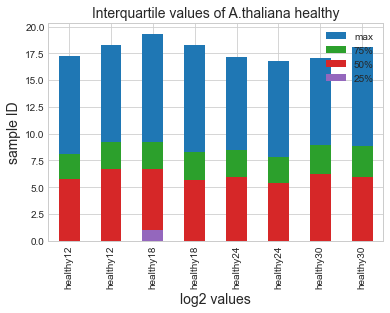

In [124]:
#df_plot.plot(x="sample", y=["mean", "std", "25%", "50%","75%","max"], kind="line")
plt.figure(figsize=(10,7))

ax = df_plot.plot(x="ID", y="max", kind="bar", title="A.thaliana infected: interquartile values")
df_plot.plot(x="ID", y="75%", kind="bar", ax=ax, color="C2")
df_plot.plot(x="ID", y="50%", kind="bar", ax=ax, color="C3")
df_plot.plot(x="ID", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile values of A.thaliana healthy',fontsize=14);
plt.xlabel('log2 values',fontsize=14);
plt.ylabel('sample ID',fontsize=14);
#plt.show()

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'healthy30'),
  Text(0.0, 0, 'healthy12'),
  Text(1.0, 0, 'healthy12'),
  Text(2.0, 0, 'healthy18'),
  Text(3.0, 0, 'healthy18'),
  Text(4.0, 0, 'healthy24'),
  Text(5.0, 0, 'healthy24'),
  Text(6.0, 0, 'healthy30'),
  Text(7.0, 0, 'healthy30'),
  Text(8.0, 0, '')])

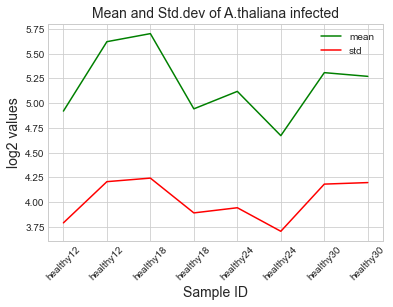

In [125]:
## gca stands for 'get current axis'
#plt.figure(figsize=(10,7))
ax = plt.gca()

df_plot.plot(kind='line',x='ID',y='mean',color='green', ax=ax)
df_plot.plot(kind='line',x='ID',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev of A.thaliana infected',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2 values',fontsize=14);
plt.xticks(rotation=45)

### Checking for genes with zeros across samples

In [126]:
df1.head(5)

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783


In [127]:
## Check number of zeros by sample

sr_ceros = df1.isin([0]).sum()
type(sr_ceros)
## transform the pandas serie into a pandas df
df_ceros = sr_ceros.to_frame()
## format the df
df_ceros.columns = df_ceros.iloc[0]
df_ceros = df_ceros.drop(df_ceros.index[0])
#df_ceros.head()

## set ID labels to accesions & send to a cvs file
df_ceros = df_with_label_ID(df_ceros)
df_ceros.head(5)
#df_ceros.to_csv("../results-data/healthy_zeros_bysample.csv", index=False, header=True)

,sample,0,ID
0,SRR3383640,7396,healthy12
4,SRR3383641,7039,healthy12
2,SRR3383782,6888,healthy18
5,SRR3383783,7627,healthy18
1,SRR3383821,7360,healthy24


***Here, zeros are counted by genes across all samples & a new column with the zero-counter values is appended at the matrix*** <br>
In consequence, several matrix containing a variable number of genes with zeros will be created as necessary. <br>
all_log2_counter_cero.csv contains the counter <br>


In [128]:
s_zeros=(df1 == 0).astype(int).sum(axis=1)
#print(s_zeros)
#type(s_zeros)    ### build a serie-pandas
## Desglozando la formula
#(df1 == 0)
#(df1 == 0).astype(int)
#(df1 == 0).sum(axis=1)

## Added a column to df1 with the counter of zeros
df1['zero-counter'] = s_zeros
df1
## Send the new matrix to all_log2_counter_cero.csv 
#df1.to_csv('../results-data/all_healthy_counterOFzeros.csv', sep='\t', index=True)

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,zero-counter
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,0
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,0
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,0
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0
...,...,...,...,...,...,...,...,...,...,...
27650,ATMG01350,1.000000,1.584963,0.000000,3.000000,1.584963,1.000000,0.000000,3.169925,2
27651,ATMG01360,4.392317,4.807355,5.700440,6.554589,6.247928,4.807355,4.523562,6.392317,0
27652,ATMG01370,4.643856,5.129283,5.321928,5.832890,6.228819,4.169925,4.321928,4.321928,0
27653,ATMG01400,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6


Here, we look for genes with n number of ceros <br>
We create the file called: **all_infected_genes_w8zeros.csv** contains the detail of these genes with cero counts across all samples <br>

In [129]:
## Filter for looking rows with x number of ceros
is_zero = (df1['zero-counter']>=8)     
df1_8 = df1[is_zero]
print(df1_8.shape)
print(df1_8.head(7))
## Send the integrated matrix to all_log2_counter_cero.csv 
#df1_8.to_csv('../results-data/all_healthy_genes_w8zeros.csv', sep='\t', index=True)

(5228, 10)
         Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  \
27   AT1G01280         0.0         0.0         0.0         0.0         0.0   
30   AT1G01305         0.0         0.0         0.0         0.0         0.0   
33   AT1G01335         0.0         0.0         0.0         0.0         0.0   
41   AT1G01400         0.0         0.0         0.0         0.0         0.0   
42   AT1G01410         0.0         0.0         0.0         0.0         0.0   
48   AT1G01460         0.0         0.0         0.0         0.0         0.0   
100  AT1G01980         0.0         0.0         0.0         0.0         0.0   

     SRR3383783  SRR3383822  SRR6283144  zero-counter  
27          0.0         0.0         0.0             8  
30          0.0         0.0         0.0             8  
33          0.0         0.0         0.0             8  
41          0.0         0.0         0.0             8  
42          0.0         0.0         0.0             8  
48          0.0         0.0 

In [130]:
df1_8.isin([0]).sum()

Genes              0
SRR3383640      5228
SRR3383821      5228
SRR3383782      5228
SRR6283145      5228
SRR3383641      5228
SRR3383783      5228
SRR3383822      5228
SRR6283144      5228
zero-counter       0
dtype: int64

## Trimming of genes with cero counts
1) All data are cleaned and normalized to log2<br>
2) First soft trimming: remove gene-IDs counting cero across all samples<br>
<br>
x = Si - 1 <br>
<br>
Donde:<br>
Si = es el numero de cero conteos traves del todas las muestras para un gen determinado<br>
Ejm: si el tamaño del conjunto es de 8 muestras, entonces 8 es el número máximo de ceros que puede tener un gen, asumiendo que no hubo expresión de ese gen para ninguna de las muestra. <br>
x =   es Si  -1


In [131]:
## Save the gene IDs with ceros in a file 
genes_cero_ToList = list(df1_8['Genes'])
with open("../results-data/all_healthy_geneIDs_with_zeros.csv", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [132]:
genes_cero_ToList
len(genes_cero_ToList)
#df1_8.head()

5228

In [133]:
## function to remove genes base on a list of indexes provided from a df

def df_drop_idx_list(df_idx, df_d):  #, df1_d

    ## get a list of gene idx to be remove provided in the df_idx 
    ## drop this idx list from the df provided (df_d)
    ## return the df with the idx provided removed
    
    ## Get the indexes of the gene rows to delete from the df provided
    lst_genes_to_drop=(df_idx.index)
    ## drop the idx marked    
    for i in lst_genes_to_drop: 
        try:
            df_d = df_d.drop([i])
        except:
            pass # doing nothing on exception, not processed because it is already dropped"
    
    return df_d 

In [134]:
# call the function  ==== df_drop_idx_list ==== to get the index of the genes to remove (df1_17) from the df1
df1 = df_drop_idx_list(df1_8, df1)

In [152]:
print(df1.shape)
df1.head(5)    

(22427, 10)


,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,zero-counter
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,0
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,0
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,0
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0


### New stats of the filtered data

In [153]:
## Create a new file with ID genes with 8 ceros across all samples removed.
df1.to_csv('../results-data/all_healthy_Log2_8ceros_drop.csv', sep='\t', index=True)
## Get some stats of the new matrix
df_plot = df1.describe().T
df_plot 

,count,mean,std,min,25%,50%,75%,max
SRR3383640,22427.0,6.066095,3.281170,0.0,3.700440,6.781360,8.519636,17.227296
SRR3383821,22427.0,6.311458,3.412693,0.0,3.807355,7.108524,8.859534,17.179394
SRR3383782,22427.0,7.030453,3.585115,0.0,4.643856,7.832890,9.655530,19.333621
SRR6283145,22427.0,6.544627,3.670224,0.0,3.700440,7.451211,9.333155,17.106450
SRR3383641,22427.0,6.930135,3.569911,0.0,4.459432,7.851749,9.598053,18.265075
SRR3383783,22427.0,6.094028,3.413693,0.0,3.584963,6.832890,8.640245,18.268208
SRR3383822,22427.0,5.760500,3.265147,0.0,3.321928,6.475733,8.194757,16.795786
SRR6283144,22427.0,6.498414,3.707255,0.0,3.584963,7.321928,9.319672,18.067209
zero-counter,22427.0,0.783698,1.888227,0.0,0.000000,0.000000,0.000000,7.000000


In [154]:
df_plot = df_with_label_ID(df_plot)
df_plot.head(5)

,sample,count,mean,std,min,25%,50%,75%,max,ID
0,SRR3383640,22427.0,6.066095,3.281170,0.0,3.700440,6.781360,8.519636,17.227296,healthy12
4,SRR3383641,22427.0,6.930135,3.569911,0.0,4.459432,7.851749,9.598053,18.265075,healthy12
2,SRR3383782,22427.0,7.030453,3.585115,0.0,4.643856,7.832890,9.655530,19.333621,healthy18
5,SRR3383783,22427.0,6.094028,3.413693,0.0,3.584963,6.832890,8.640245,18.268208,healthy18
1,SRR3383821,22427.0,6.311458,3.412693,0.0,3.807355,7.108524,8.859534,17.179394,healthy24


In [155]:
#df_plot.to_csv("../results-data/healthy_stats_noZeros_tesis.csv", index=False, header=True)

Text(0, 0.5, 'sample ID')

<Figure size 720x504 with 0 Axes>

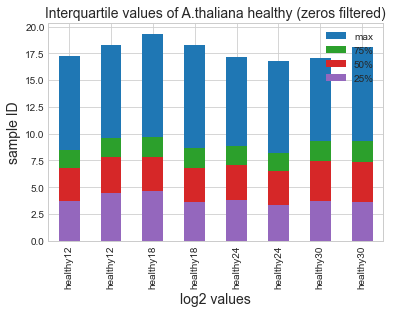

In [156]:
plt.figure(figsize=(10,7))

ax = df_plot.plot(x="ID", y="max", kind="bar", title="A.thaliana healthy: interquartile values")
df_plot.plot(x="ID", y="75%", kind="bar", ax=ax, color="C2")
df_plot.plot(x="ID", y="50%", kind="bar", ax=ax, color="C3")
df_plot.plot(x="ID", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile values of A.thaliana healthy (zeros filtered)',fontsize=14)
plt.xlabel('log2 values',fontsize=14)
plt.ylabel('sample ID',fontsize=14)

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'healthy30'),
  Text(0.0, 0, 'healthy12'),
  Text(1.0, 0, 'healthy12'),
  Text(2.0, 0, 'healthy18'),
  Text(3.0, 0, 'healthy18'),
  Text(4.0, 0, 'healthy24'),
  Text(5.0, 0, 'healthy24'),
  Text(6.0, 0, 'healthy30'),
  Text(7.0, 0, 'healthy30'),
  Text(8.0, 0, '')])

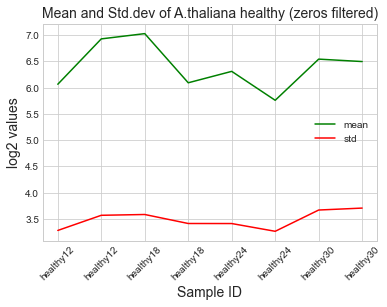

In [157]:
## gca stands for 'get current axis'
#plt.figure(figsize=(10,7))
ax = plt.gca()

df_plot.plot(kind='line',x='ID',y='mean',color='green', ax=ax)
df_plot.plot(kind='line',x='ID',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev of A.thaliana healthy (zeros filtered)',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2 values',fontsize=14);
plt.xticks(rotation=45)

In [158]:
## order a series of a df
col_ceros = df_tmp['mean'].tolist()
col_ceros.sort(reverse=False)
print(col_ceros)

[7.667523095495549, 7.9936854571313285, 8.097775038329571, 8.31052290909853, 8.683972051795305, 8.729270651457838, 9.05056963270367, 9.11849938631474]


### Now explore the new distributions without ceros across all samples
### Plot all the sample in one plot (histogram and KDE)

In [160]:
# load file to be plotted
print((os.getcwd()))
df_nozeros = pd.read_csv("../results-data/all_healthy_Log2_8ceros_drop.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Genes", "zero-counter"], axis = 1, inplace = True) 
print(df_nozeros.head(3))

## Get sample list names
sample_lst=df_nozeros.columns
print(sample_lst)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts
   SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  SRR3383783  \
0    6.523562    7.055282    6.845490    6.266787    7.592457    5.857981   
1    6.768184    7.189825    7.813781    7.459432    8.066089    6.882643   
2    3.807355    3.321928    5.169925    4.392317    4.523562    3.807355   

   SRR3383822  SRR6283144  
0    6.066089    7.507795  
1    6.539159    7.357552  
2    4.087463    4.700440  
Index(['SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145', 'SRR3383641',
       'SRR3383783', 'SRR3383822', 'SRR6283144'],
      dtype='object')


Plot both the histogram and densities in the same plot with the seaborn package (imported as sns) which allows you to do that via the distplot(). 
Since seaborn is built on top of matplotlib, you can use the sns and plt one after the other.

###  Adding labels for plotting (leyends)

In [161]:
file='../meta-data/ID_samples.csv'
lst_header=["sample","huesped","condicion","fungus","ID"] 
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
print(df_meta.index)
print(df_meta)

## filter the ID sample
# is_sample =  df_meta['sample']=='SRR364399'
# sample = df_meta[is_sample]
# ID_sample = sample['ID'].values[0]
# ID_sample

RangeIndex(start=0, stop=25, step=1)
         sample         ID
0     SRR364389       Ch22
1     SRR364400       Ch40
2     SRR364401       Ch40
3     SRR364390       Ch22
4     SRR364391       Ch22
5     SRR364392       Ch22
6     SRR364398       Ch40
7     SRR364399       Ch40
8    SRR3383696       Bc12
9    SRR3383697       Bc12
10   SRR3383779       Bc18
11   SRR3383780       Bc18
12  SRR10586397       Bc24
13  SRR10586399       Bc24
14   SRR6283146       Ss30
15   SRR6283147       Ss30
16   SRR6283148       Ss30
17   SRR3383640  healthy12
18   SRR3383641  healthy12
19   SRR3383782  healthy18
20   SRR3383783  healthy18
21   SRR3383821  healthy24
22   SRR3383822  healthy24
23   SRR6283144  healthy30
24   SRR6283145  healthy30


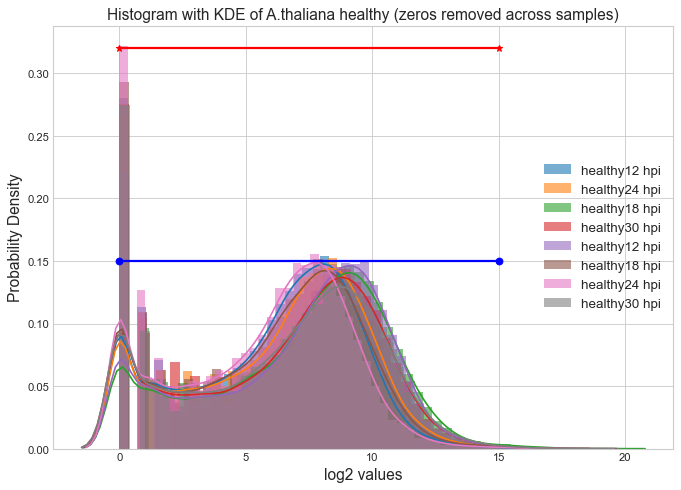

In [162]:
# Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)  
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==file
    #print(is_sample)
    sample = df_meta[is_sample]
    #print(sample)
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
 
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 

plt.title('Histogram with KDE of A.thaliana healthy (zeros removed across samples)',fontsize=14);
plt.xlabel('log2 values',fontsize=14);
plt.ylabel('Probability Density',fontsize=14);
#plt.suptitle("A.thaliana infected (zeros removed across all samples)", fontsize=14)
## add arbitrary lines to canvas
plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
plt.plot([0, 15], [.32, .32], 'k-', lw=2, color='red',marker = '*')
#plt.text(15, 0.6, "Size:86.19%",fontsize=24)
plt.legend(loc='center right',fontsize=12);    
#plt.savefig("../plots/all_infected_KDE_8zeros_drop.png");

### Based on the stats gotten we apply a cutoff at 4.728
average of Q1:3.85042190788518 <br>
average of Q2: 7.20703573471681 <br>
average of Q3: 9.01507280142142 <br>
average of mean: 6.40446390851493 <br>

In [163]:
# df1 has the Gene headers required for additional trimming
df1.shape
# df_nozeros is prepared to plot distributions which don't have Gene headers
#df_nozeros.shape

(22427, 10)

In [164]:
def filter_df(df, *args):

    # Filter a dataframe by the value of a column 
    # Input: df is the dataframe, *args are the criteria to filter
    # output: a new dataframe filtered 
    
    for k, v in args:
        df_cut = df[df[k] >= v]
    return df_cut

In [173]:
## Filter is looking for genes with 8 ceros across samples (we have 8 samples)

size_original = len(df_nozeros)
print(size_original)
#cut_value = 3.850 
cut_value = 7.207
b_first=True

from collections import defaultdict
dict_cut = defaultdict(list)

for sample in sample_lst:
    if b_first:
        df_cut = filter_df(df1, (sample, cut_value))
        size_new = len(df_cut)
        size = size_original - size_new
        #print('Removed from '+ sample,str(size))
        b_first = False       
        dict_cut['sample'].append(sample)
        dict_cut['genes_cut'].append(size)
        
    else:
        df_cut = filter_df(df_cut, (sample, cut_value))
        size_new = len(df_cut)
        size = size_original - size_new
        #print('Removed from '+ sample,str(size))
        dict_cut['sample'].append(sample)
        dict_cut['genes_cut'].append(size)
        
#df_cut.to_csv('../results-data/all_healthy_Log2_8ceros_Q1_drop.csv', sep='\t', index=False)
df_cut.to_csv('../results-data/all_healthy_Log2_8ceros_Q2_drop.csv', sep='\t', index=False)
df_cut_stats = pd.DataFrame(dict_cut)
print(len(df_cut))
df_cut.head(5)

14865
7782


,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,zero-counter
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0
7,AT1G01080,9.930737,8.951285,11.053247,10.323055,10.912889,9.939579,8.748193,10.144658,0
8,AT1G01090,10.324181,10.422065,11.934059,12.310613,11.452241,10.813781,9.911392,12.558660,0
9,AT1G01100,8.918863,9.184875,10.366322,10.510764,10.051209,8.977280,8.643856,10.088788,0


In [174]:
## Get some stats of the new matrix
df_tmp = df_cut.describe().T
df_tmp = df_with_label_ID(df_tmp)
df_tmp.head(5)
#df_tmp.to_csv("../results-data/healthy_stats_noZeros_Q1_tesis.csv", index=False, header=True)
#df_tmp.to_csv("../results-data/healthy_stats_noZeros_Q2_tesis.csv", index=False, header=True)

,sample,count,mean,std,min,25%,50%,75%,max,ID
0,SRR3383640,7782.0,9.217593,1.253114,7.209453,8.312883,8.991522,9.871135,17.227296,healthy12
4,SRR3383641,7782.0,10.284483,1.241704,7.285402,9.392317,10.066089,10.934981,18.265075,healthy12
2,SRR3383782,7782.0,10.389973,1.399157,7.303781,9.394463,10.143383,11.099183,19.333621,healthy18
5,SRR3383783,7782.0,9.365920,1.364176,7.209453,8.383704,9.127994,10.057992,18.268208,healthy18
1,SRR3383821,7782.0,9.569098,1.305711,7.238405,8.622052,9.310613,10.226412,17.179394,healthy24


<Figure size 720x504 with 0 Axes>

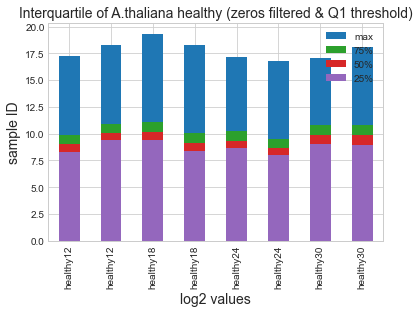

In [175]:
plt.figure(figsize=(10,7))

ax = df_tmp.plot(x="ID", y="max", kind="bar")
df_tmp.plot(x="ID", y="75%", kind="bar", ax=ax, color="C2")
df_tmp.plot(x="ID", y="50%", kind="bar", ax=ax, color="C3")
df_tmp.plot(x="ID", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile of A.thaliana healthy (zeros filtered & Q1 threshold)',fontsize=14);
#plt.title('Interquartile of A.thaliana healthy (zeros filtered & Q2 threshold)',fontsize=14);
plt.xlabel('log2 values',fontsize=14);
plt.ylabel('sample ID',fontsize=14);

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


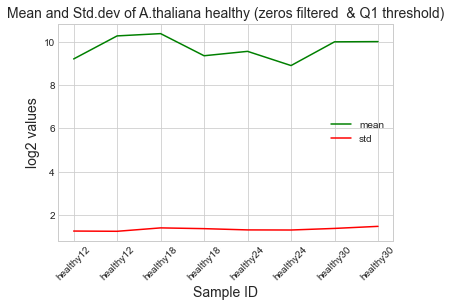

In [176]:
## gca stands for 'get current axis'
ax = plt.gca()
df_tmp.plot(kind='line',x='ID',y='mean',color='green', ax=ax)
df_tmp.plot(kind='line',x='ID',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev of A.thaliana healthy (zeros filtered  & Q1 threshold)',fontsize=14);
#plt.title('Mean and Std.dev of A.thaliana healthy (zeros filtered  & Q2 threshold)',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2 values',fontsize=14);
plt.xticks(rotation=45);

In [177]:
# load file : format df to plot distributions

#df_nozeros=pd.read_csv("../results-data/all_healthy_Log2_8ceros_Q1_drop.csv", sep='\t')
df_nozeros=pd.read_csv("../results-data/all_healthy_Log2_8ceros_Q2_drop.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Genes", "zero-counter"], axis = 1, inplace = True) 
print(df_nozeros.head(3))

   SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  SRR3383783  \
0   10.005625    9.992938   11.214926   11.311748   11.165535   10.371777   
1    9.733015    9.419960   11.379920   10.581201   10.854868   10.250298   
2    9.930737    8.951285   11.053247   10.323055   10.912889    9.939579   

   SRR3383822  SRR6283144  
0    9.319672   11.283667  
1    8.668885   10.817783  
2    8.748193   10.144658  


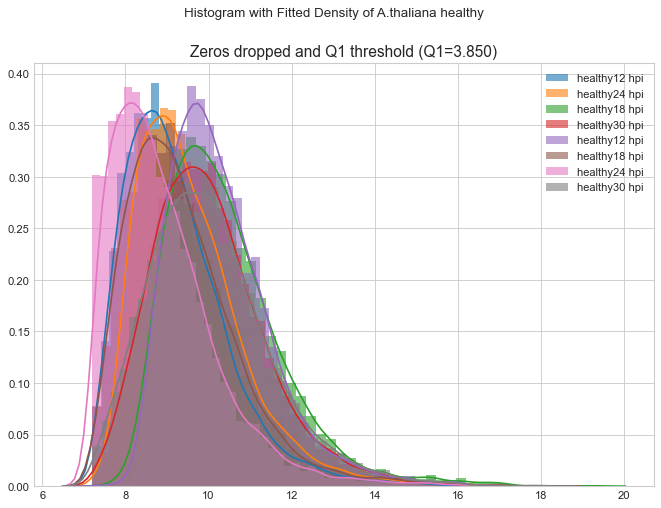

In [178]:
plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)  
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==file
    #print(is_sample)
    sample = df_meta[is_sample]
    #print(sample)
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
 
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 

plt.title('Zeros dropped and Q1 threshold (Q1=3.850)',fontsize=14);
#plt.title('Zeros dropped and Q2 threshold (Q1=7.207)',fontsize=14);
plt.suptitle("Histogram with Fitted Density of A.thaliana healthy")  
plt.legend();

#### save a properly formated file

In [182]:
df_healthy = pd.read_csv("../results-data/all_healthy_Log2_8ceros_Q2_drop.csv", sep='\t')
df_healthy.head(5)

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,zero-counter
0,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
1,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0
2,AT1G01080,9.930737,8.951285,11.053247,10.323055,10.912889,9.939579,8.748193,10.144658,0
3,AT1G01090,10.324181,10.422065,11.934059,12.310613,11.452241,10.813781,9.911392,12.558660,0
4,AT1G01100,8.918863,9.184875,10.366322,10.510764,10.051209,8.977280,8.643856,10.088788,0


In [183]:
df_healthy = df_healthy.rename(columns={'SRR3383640': 'healthy12',
                                         'SRR3383821':'healthy24',
                                         'SRR3383782':'healthy18',
                                         'SRR6283145':'healthy30',
                                         'SRR3383641':'healthy12',
                                         'SRR3383783':'healthy18',
                                         'SRR3383822':'healthy24',
                                         'SRR6283144':'healthy30',
                                        })
df_healthy.head(5)

,Genes,healthy12,healthy24,healthy18,healthy30,healthy12,healthy18,healthy24,healthy30,zero-counter
0,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
1,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0
2,AT1G01080,9.930737,8.951285,11.053247,10.323055,10.912889,9.939579,8.748193,10.144658,0
3,AT1G01090,10.324181,10.422065,11.934059,12.310613,11.452241,10.813781,9.911392,12.558660,0
4,AT1G01100,8.918863,9.184875,10.366322,10.510764,10.051209,8.977280,8.643856,10.088788,0


In [184]:
df_healthy.to_csv('../results-data/all_healthy_Log2_8ceros_Q2_drop.csv', sep='\t', index=False)

In [113]:
## Filter for looking rows with x number of ceros (second parse)
## Take the lastet dropped file to save cpu performance 

df_nozeros=pd.read_csv("all_log2_dropped8ceros.csv", sep='\t')
is_zero7 = (df_nozeros['zero-counter']>=7)     
#print(is_zero7)
df1_7 = df_nozeros[is_zero7]
print(" Match records: "+ str(df1_7.shape))
print(df1_7)

## Send the integrated matrix 
#df1_7.to_csv('all_log2_7_ceros.csv', sep='\t', index=True)

 Match records: (950, 11)
       Unnamed: 0      Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  \
14             14  AT1G01150    0.000000         0.0         1.0    0.000000   
102           109  AT1G02065    0.000000         0.0         0.0    2.000000   
120           129  AT1G02250    2.807355         0.0         0.0    0.000000   
146           156  AT1G02490    1.000000         0.0         0.0    0.000000   
151           164  AT1G02570    0.000000         0.0         0.0    0.000000   
...           ...        ...         ...         ...         ...         ...   
22409       27627  ATMG01110    0.000000         0.0         0.0    1.000000   
22415       27639  ATMG01240    0.000000         0.0         0.0    0.000000   
22416       27640  ATMG01250    0.000000         0.0         0.0    0.000000   
22417       27641  ATMG01260    0.000000         0.0         0.0    2.000000   
22418       27643  ATMG01275    0.000000         0.0         0.0    1.584963   

       SRR338

In [114]:
df1_7.isin([0]).sum()

Unnamed: 0        0
Genes             0
SRR3383640      846
SRR3383821      843
SRR3383782      778
SRR6283145      806
SRR3383641      793
SRR3383783      872
SRR3383822      871
SRR6283144      841
zero-counter      0
dtype: int64

In [39]:
## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_7['Genes'])

with open("all_genesIDs_7cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [115]:
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_7.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped7ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Current dimensions:  (22427, 11)
New dimensions:  (21477, 11)


***Plot again to see the new distribution***

In [116]:
## sample names
sample_lst

Index(['SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145', 'SRR3383641',
       'SRR3383783', 'SRR3383822', 'SRR6283144'],
      dtype='object')

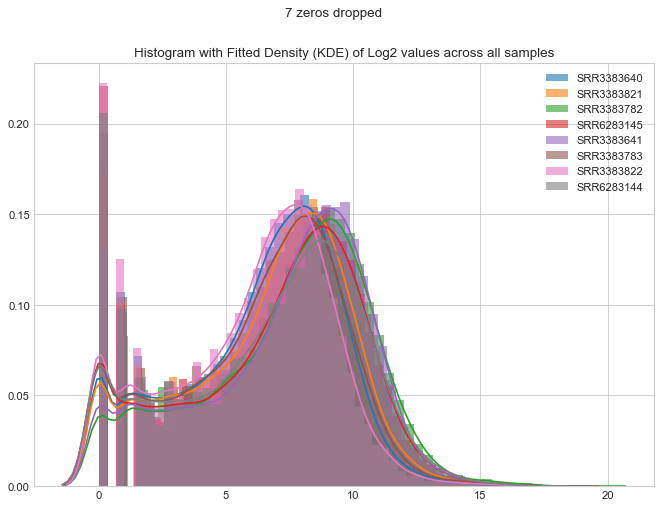

In [117]:
plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("7 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop7zeros.png");

***Another trimming action of genes with 6 zeros across samples***

In [44]:
## Filter for looking rows with x number of ceros (second parse)
## Take the latest dropped file to save cpu performance 

df_nozeros=pd.read_csv("all_log2_dropped7ceros.csv", sep='\t')
is_zero6 = (df_nozeros['zero-counter']>=6)     
#print(is_zero6)
df1_6 = df_nozeros[is_zero6]
print(" Match records: "+ str(df1_6.shape))
#print(df1_6)
## Send the integrated matrix 
df1_6.to_csv('all_log2_6_ceros.csv', sep='\t', index=True)

 Match records: (610, 12)


In [45]:
## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_6['Genes'])

with open("all_genesIDs_6cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_6.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped6ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Current dimensions:  (21477, 12)
New dimensions:  (20867, 12)


***Plot again to see the new distribution***

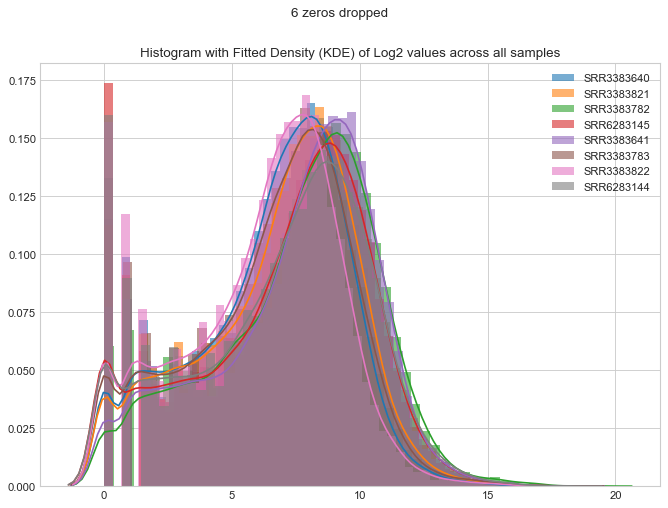

In [46]:
#Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("6 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop6zeros.png");

In [47]:
## Another round dropping 5
df_nozeros=pd.read_csv("all_log2_dropped6ceros.csv", sep='\t')
is_zero5 = (df_nozeros['zero-counter']>=5)     
#print(is_zero5)
df1_5 = df_nozeros[is_zero5]
print("Match records: "+ str(df1_5.shape))
## Send to file 
df1_5.to_csv('all_log2_5_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_5['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_5cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_5.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped5ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (472, 13)
Current dimensions:  (20867, 13)
New dimensions:  (20395, 13)


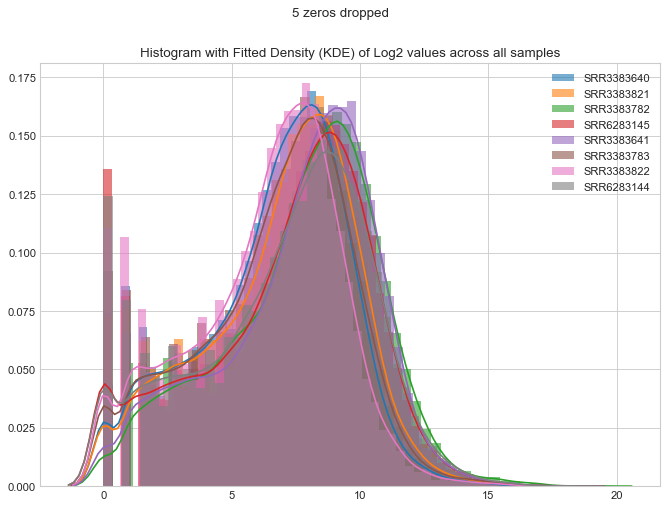

In [48]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("5 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop5zeros.png");

In [49]:
## Another round dropping 4
df_nozeros=pd.read_csv("all_log2_dropped5ceros.csv", sep='\t')
is_zero4 = (df_nozeros['zero-counter']>=4)     
#print(is_zero4)
df1_4 = df_nozeros[is_zero4]
print("Match records: "+ str(df1_4.shape))
## Send to file 
df1_4.to_csv('all_log2_4_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_4['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_4cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_4.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped4ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (389, 14)
Current dimensions:  (20395, 14)
New dimensions:  (20006, 14)


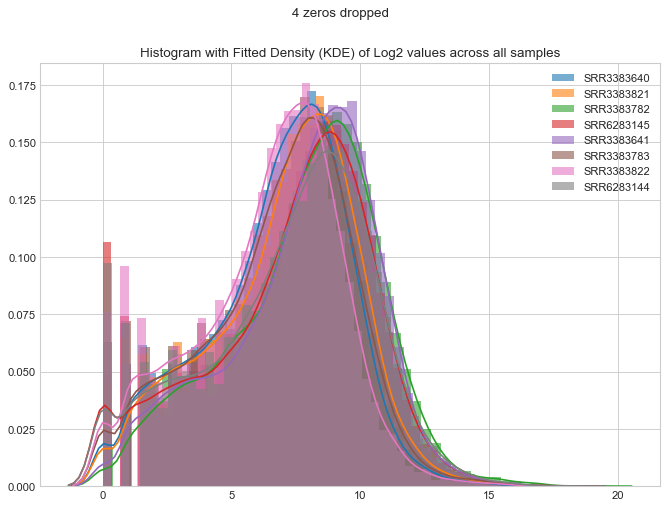

In [50]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("4 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop4zeros.png");

In [51]:
## Another round dropping 3
df_nozeros=pd.read_csv("all_log2_dropped4ceros.csv", sep='\t')
is_zero3 = (df_nozeros['zero-counter']>=3)     
#print(is_zero3)
df1_3 = df_nozeros[is_zero3]
print("Match records: "+ str(df1_3.shape))
## Send to file 
df1_3.to_csv('all_log2_3_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_3['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_3cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_3.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped3ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (447, 15)
Current dimensions:  (20006, 15)
New dimensions:  (19559, 15)


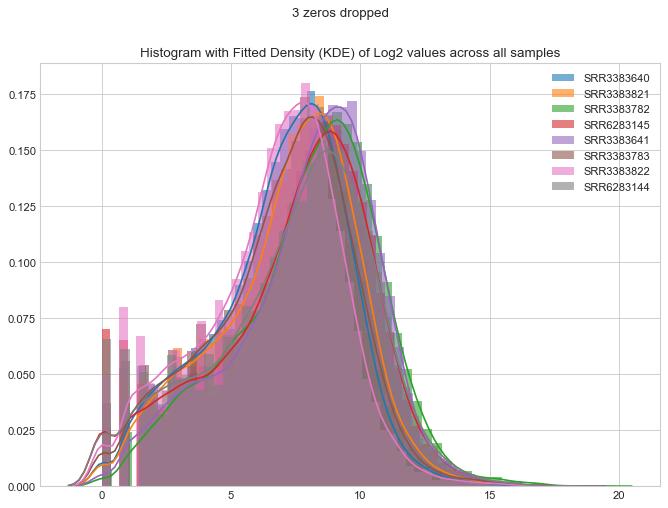

In [52]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("3 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop3zeros.png");